---
* *** 원본 소스는 홍콩과기대 김성훈 교수님의  [Github link](https://github.com/hunkim/DeepLearningZeroToAll)를 참조하세요 ***     
* *** Watson studio notebook 에서 작업 가능하도록 수정하였으며***
* *** 한글로 설명된 부분은 제가 스터디 하면서 이해한 내용을 추가한 것입니다. ***
---

* ***Softmax 로 돌린것과  Neural Network 으로 돌린 accuracy 결과를 비교해보기 위해서 우선은 softmax로  ...... ***

In [1]:
# Lab 7 Learning rate and Evaluation
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
tf.set_random_seed(777)  # reproducibility

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weights & bias for nn layers
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

hypothesis = tf.matmul(X, W) + b

# define cost/loss & optimizer - Adam 을 사용함
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

C:\Users\HyeonSuPARK\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Epoch: 0001 cost = 5.745170984
Epoch: 0002 cost = 1.780056711
Epoch: 0003 cost = 1.122778637
Epoch: 0004 cost = 0.872012248
Epoch: 0005 cost = 0.738203186
Epoch: 0006 cost = 0.654728888
Epoch: 0007 cost = 0.596023608
Epoch: 0008 cost = 0.552216820
Epoch: 0009 cost = 0.518254961
Epoch: 0010 cost = 0.4

In [7]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Accuracy: 0.9023


* ***sample 을 random 하게 가져와서 그림으로 보여주고 예측합니다. ***

Label:  [8]
Prediction:  [6]


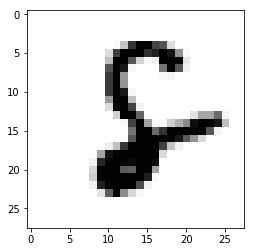

In [77]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

In [ ]:
'''
Epoch: 0001 cost = 5.888845987
Epoch: 0002 cost = 1.860620173
Epoch: 0003 cost = 1.159035648
Epoch: 0004 cost = 0.892340870
Epoch: 0005 cost = 0.751155428
Epoch: 0006 cost = 0.662484806
Epoch: 0007 cost = 0.601544010
Epoch: 0008 cost = 0.556526115
Epoch: 0009 cost = 0.521186961
Epoch: 0010 cost = 0.493068354
Epoch: 0011 cost = 0.469686249
Epoch: 0012 cost = 0.449967254
Epoch: 0013 cost = 0.433519321
Epoch: 0014 cost = 0.419000337
Epoch: 0015 cost = 0.406490815
Learning Finished!
Accuracy: 0.9035
'''